# Yet to be finished

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from adjustText import adjust_text
from highlight_text import fig_text

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [3]:
#scrape data. We will allow users to enter a base url
base_url = 'https://understat.com/team/Manchester_City/2020'
url = base_url

In [4]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var datesData 	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x2214105\x22,\x22isResult\x22\x3Atrue,\x22side\x22\x3A\x22a\x22,\x22h\x22\x3A\x7B\x22id\x22\x3A\x22229\x22,\x22title\x22\x3A\x22Wolverhampton\x20Wanderers\x22,\x22short_title\x22\x3A\x22WOL\x22\x7D,\x22a\x22\x3A\x7B\x22id\x22\x3A\x2288\x22,\x22title\x22\x3A\x22Manchester\x20City\x22,\x22short_title\x22\x3A\x22MCI\x22\x7D,\x22goals\x22\x3A\x7B\x22h\x22\x3A\x221\x22,\x22a\x22\x3A\x223\x22\x7D,\x22xG\x22\x3A\x7B\x22h\x22\x3A\x220.727677\x22,\x22a\x22\x3A\x222.07651\x22\x7D,\x22datetime\x22\x3A\x222020\x2D09\x2D21\x2019\x3A15\x3A00\x22,\x22forecast\x22\x3A\x7B\x22w\x22\x3A0.1193765532225985748215890680512529797852039337158203125,\x22d\x22\x3A0.1930091531498348278450549742046860046684741973876953125,\x22l\x22\x3A0.68761428729591056452363773132674396038055419921875\x7D,\x22result\x22\x3A\

In [7]:
#get only the important data
strings = scripts[1].string
strings

"\n\tvar datesData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2214105\\x22,\\x22isResult\\x22\\x3Atrue,\\x22side\\x22\\x3A\\x22a\\x22,\\x22h\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x22229\\x22,\\x22title\\x22\\x3A\\x22Wolverhampton\\x20Wanderers\\x22,\\x22short_title\\x22\\x3A\\x22WOL\\x22\\x7D,\\x22a\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x2288\\x22,\\x22title\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22short_title\\x22\\x3A\\x22MCI\\x22\\x7D,\\x22goals\\x22\\x3A\\x7B\\x22h\\x22\\x3A\\x221\\x22,\\x22a\\x22\\x3A\\x223\\x22\\x7D,\\x22xG\\x22\\x3A\\x7B\\x22h\\x22\\x3A\\x220.727677\\x22,\\x22a\\x22\\x3A\\x222.07651\\x22\\x7D,\\x22datetime\\x22\\x3A\\x222020\\x2D09\\x2D21\\x2019\\x3A15\\x3A00\\x22,\\x22forecast\\x22\\x3A\\x7B\\x22w\\x22\\x3A0.1193765532225985748215890680512529797852039337158203125,\\x22d\\x22\\x3A0.1930091531498348278450549742046860046684741973876953125,\\x22l\\x22\\x3A0.68761428729591056452363773132674396038055419921875\\x7D,\\x22result\\x22\\x3A\\x22w\\x22\\x7D,\\x7B\\x22id\\x22\\

In [10]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)
data

[{'id': '14105',
  'isResult': True,
  'side': 'a',
  'h': {'id': '229', 'title': 'Wolverhampton Wanderers', 'short_title': 'WOL'},
  'a': {'id': '88', 'title': 'Manchester City', 'short_title': 'MCI'},
  'goals': {'h': '1', 'a': '3'},
  'xG': {'h': '0.727677', 'a': '2.07651'},
  'datetime': '2020-09-21 19:15:00',
  'forecast': {'w': 0.11937655322259857,
   'd': 0.19300915314983483,
   'l': 0.6876142872959106},
  'result': 'w'},
 {'id': '14112',
  'isResult': True,
  'side': 'h',
  'h': {'id': '88', 'title': 'Manchester City', 'short_title': 'MCI'},
  'a': {'id': '75', 'title': 'Leicester', 'short_title': 'LEI'},
  'goals': {'h': '2', 'a': '5'},
  'xG': {'h': '1.44633', 'a': '2.86721'},
  'datetime': '2020-09-27 15:30:00',
  'forecast': {'w': 0.1703213453135138,
   'd': 0.16112104825370263,
   'l': 0.6685572219799516},
  'result': 'l'},
 {'id': '14469',
  'isResult': True,
  'side': 'a',
  'h': {'id': '245', 'title': 'Leeds', 'short_title': 'LED'},
  'a': {'id': '88', 'title': 'Manches

In [11]:
datetime = []
xG = []
xGA = []
result = []
team = []
GF = []
GA = []

for index in range(len(data)):
    for key in data[index]:
        if key == 'datetime':
            datetime.append(data[index][key])
        if key == 'result':
            result.append(data[index][key])
    if data[index].get('side') == 'h':
        xG.append(float(data[index].get('xG').get('h')))
        xGA.append(float(data[index].get('xG').get('a')))
        team.append(data[index].get('a').get('title'))
        GF.append(int(data[index].get('goals').get('h')))
        GA.append(int(data[index].get('goals').get('a')))
    if data[index].get('side') == 'a':
        xG.append(float(data[index].get('xG').get('a')))
        xGA.append(float(data[index].get('xG').get('h')))
        team.append(data[index].get('h').get('title'))
        GF.append(int(data[index].get('goals').get('a')))
        GA.append(int(data[index].get('goals').get('h')))

In [12]:
col_names = ['DateTime', 'GF', 'GA', 'xG','xGA','Result','Opponent']
df = pd.DataFrame([datetime,GF,GA,xG,xGA,result,team],index=col_names)
df = df.T
df

,DateTime,GF,GA,xG,xGA,Result,Opponent
0,2020-09-21 19:15:00,3,1,2.07651,0.727677,w,Wolverhampton Wanderers
1,2020-09-27 15:30:00,2,5,1.44633,2.86721,l,Leicester
2,2020-10-03 16:30:00,1,1,1.41533,2.56662,d,Leeds
3,2020-10-17 16:30:00,1,0,1.43023,0.838322,w,Arsenal
4,2020-10-24 11:30:00,1,1,0.892456,0.263739,d,West Ham
5,2020-10-31 12:30:00,1,0,1.89643,0.687544,w,Sheffield United
6,2020-11-08 16:30:00,1,1,1.58487,1.18789,d,Liverpool
7,2020-11-21 17:30:00,0,2,1.66325,0.761142,l,Tottenham
8,2020-11-28 15:00:00,5,0,2.26129,0.419877,w,Burnley
9,2020-12-05 15:00:00,2,0,3.26328,0.287444,w,Fulham


In [18]:
TEAM_NAME = "Manchester City"

window = 5
gd_color = "dodgerblue"
xgd_color = "gold"

gd_rolling = df["GF"].rolling(window).mean().values[window:]
xgd_rolling = df["xG"].rolling(window).mean().values[window:]

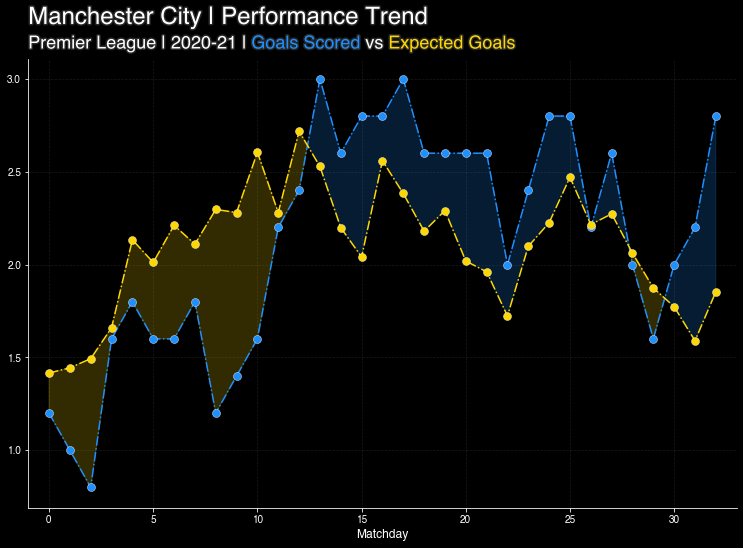

In [19]:
with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(gd_rolling, color=gd_color,  linestyle="-.", marker="o",  mfc=gd_color, mec="white", markersize=8, mew=0.4, zorder=10)  ##goal-difference
    ax.plot(xgd_rolling, color=xgd_color,  linestyle="-.", marker = "o", mfc=xgd_color, mec="white", markersize=8, mew=0.4, zorder=10) ##expected goals difference
    
    ax.fill_between(x=range(len(gd_rolling)), y1=gd_rolling, y2=xgd_rolling, where = gd_rolling>xgd_rolling, 
                    alpha=0.2, color=gd_color, interpolate=True, zorder=5) ##shade the areas in between
    ax.fill_between(x=range(len(gd_rolling)), y1=gd_rolling, y2=xgd_rolling, where = gd_rolling<=xgd_rolling, 
                    alpha=0.2, color=xgd_color, interpolate=True, zorder=5)
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)  
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## labels, titles and subtitles
    ax.set(xlabel=f"Matchday", xlim=(-1, len(df)-window))     
    ax.xaxis.label.set(fontsize=12, fontweight='bold')    

    fig.text(x=0.08, y=0.92, s="Manchester City | Performance Trend", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s='Premier League | 2020-21 | <Goals Scored> vs <Expected Goals>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": gd_color},
                                  {"color": xgd_color}])
    
fig.savefig("xg-performance-chart", dpi=180) ##save image